In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import preprocess as pre

In [2]:
users_file = "BX-Users.csv"
books_file = "BX-Books.csv"
rating_file = "BX-Ratings.csv"
new_users_file = "BX-NewBooksUsers.csv"
new_books_file = "BX-NewBooks.csv"
new_ratings_file = "BX-NewBooksRatings.csv"

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,173169,lancaster,pennsylvania,"usa""",5.0,0-10,0440213029,5,The Lilac Bus: Stories,Maeve Binchy,1992,Dell
1,179310,agua dulce,california,"usa""",15.0,10-20,0440213029,5,The Lilac Bus: Stories,Maeve Binchy,1992,Dell
2,264365,ephrata,pennsylvania,"usa""",15.0,10-20,0440213029,6,The Lilac Bus: Stories,Maeve Binchy,1992,Dell
3,269566,seattle,washington,"usa""",15.0,10-20,0440213029,7,The Lilac Bus: Stories,Maeve Binchy,1992,Dell
4,27169,catlettsburg,kentucky,"usa""",15.0,10-20,0440213029,8,The Lilac Bus: Stories,Maeve Binchy,1992,Dell
...,...,...,...,...,...,...,...,...,...,...,...,...
204159,202885,lacey,washington,"usa""",62.0,60-70,0743411544,5,Two Brothers,Linda Lael Miller,2000,Pocket
204160,118632,atlanta,georgia,"usa""",64.0,60-70,0312853807,7,Zero Coupon,Paul Erdman,1993,St Martins Pr
204161,160697,erie,pennsylvania,"usa""",67.0,60-70,0312853807,7,Zero Coupon,Paul Erdman,1993,St Martins Pr
204162,14449,saskatoon,saskatchewan,"canada""",72.0,70-80,0312853807,8,Zero Coupon,Paul Erdman,1993,St Martins Pr


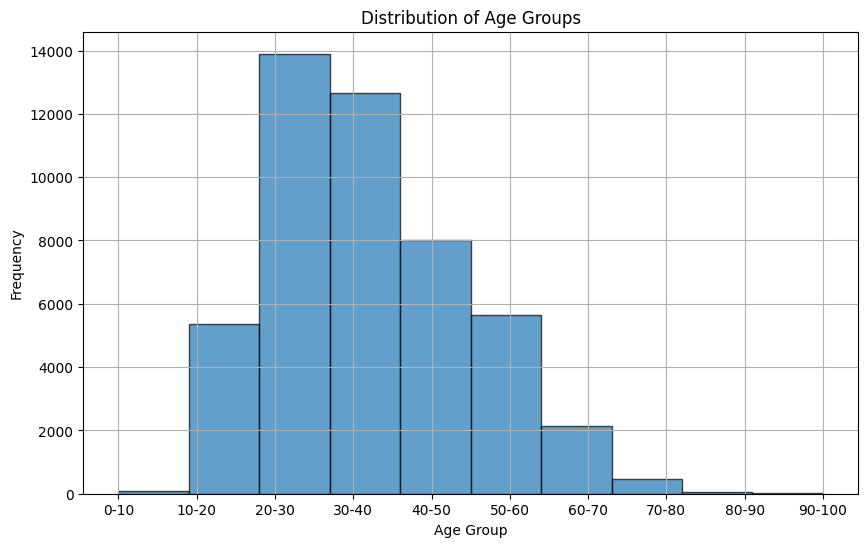

In [3]:
users_df = pd.read_csv(users_file)
ratings_df = pd.read_csv(rating_file)
books_df = pd.read_csv(books_file)

# Imputation missing data and discretise the age based on an age group
users_df = pre.ages_imputation(pre.weighted_age_dict(users_file), users_df)
users_df = pre.city_imputation(users_df)
users_df = pre.state_imputation(users_df)
users_df = pre.country_imputation(users_df)
users_df = pre.discretising(users_df, ratings_df, books_df)
merged_df = pd.merge(users_df, ratings_df, on="User-ID", how="inner")
merged_df = pd.merge(merged_df, books_df, on="ISBN", how="inner")
merged_df = pre.author_imputation(merged_df)
merged_df

In [4]:
merged_df = pre.text_process(merged_df)
merged_df

,User-ID,User-City,User-State,User-Country,User-Age,Age-Group,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Book-Publisher
0,173169,LANCASTER,PENNSYLVANIA,"USA""",5.0,0-10,0440213029,5,THE LILAC BUS: STORIES,MAEVE BINCHY,1992,DELL
1,179310,AGUA DULCE,CALIFORNIA,"USA""",15.0,10-20,0440213029,5,THE LILAC BUS: STORIES,MAEVE BINCHY,1992,DELL
2,264365,EPHRATA,PENNSYLVANIA,"USA""",15.0,10-20,0440213029,6,THE LILAC BUS: STORIES,MAEVE BINCHY,1992,DELL
3,269566,SEATTLE,WASHINGTON,"USA""",15.0,10-20,0440213029,7,THE LILAC BUS: STORIES,MAEVE BINCHY,1992,DELL
4,27169,CATLETTSBURG,KENTUCKY,"USA""",15.0,10-20,0440213029,8,THE LILAC BUS: STORIES,MAEVE BINCHY,1992,DELL
...,...,...,...,...,...,...,...,...,...,...,...,...
204159,202885,LACEY,WASHINGTON,"USA""",62.0,60-70,0743411544,5,TWO BROTHERS,LINDA LAEL MILLER,2000,POCKET
204160,118632,ATLANTA,GEORGIA,"USA""",64.0,60-70,0312853807,7,ZERO COUPON,PAUL ERDMAN,1993,ST MARTINS PR
204161,160697,ERIE,PENNSYLVANIA,"USA""",67.0,60-70,0312853807,7,ZERO COUPON,PAUL ERDMAN,1993,ST MARTINS PR
204162,14449,SASKATOON,SASKATCHEWAN,"CANADA""",72.0,70-80,0312853807,8,ZERO COUPON,PAUL ERDMAN,1993,ST MARTINS PR
